In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df_train = pd.read_csv('./data/cleaned_data.csv')

In [59]:
df_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,3,5,7.77,3,2,More than 8 hours,Healthy,BHM,No,1,2,No,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,3,4,7.77,3,3,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,Teacher,5,3,8.97,2,3,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,3,5,7.77,3,1,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,3,1,7.77,3,1,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,Teacher,3,5,7.77,3,4,5-6 hours,Unhealthy,Class 12,No,2,4,Yes,1
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,3,5,7.77,3,4,7-8 hours,Moderate,B.Tech,Yes,6,5,Yes,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,3,3,7.77,3,1,More than 8 hours,Moderate,B.Com,No,4,4,No,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,3,5,7.77,3,2,5-6 hours,Moderate,ME,Yes,10,1,No,0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  int64  
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             140700 non-null  object 
 7   Academic Pressure                      140700 non-null  int64  
 8   Work Pressure                          140700 non-null  int64  
 9   CGPA                                   140700 non-null  float64
 10  Study Satisfaction                     140700 non-null  

# one hot encoding untuk Gender features

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_train[['Gender']])

In [63]:
encoded_data

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], shape=(140700, 2))

In [64]:
encoded_df = pd.DataFrame(data=encoded_data, columns=['Female','Male'])

In [65]:
encoded_df

,Female,Male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
140695,1.0,0.0
140696,1.0,0.0
140697,1.0,0.0
140698,1.0,0.0


In [66]:
df_train['Female'] = encoded_df['Female']
df_train['Male'] = encoded_df['Male']

In [67]:
df_train['Female'] = df_train['Female'].astype(int)
df_train['Male'] = df_train['Male'].astype(int)

# encoding working professional or student feature

In [68]:
df_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Female,Male
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,3,5,7.77,...,More than 8 hours,Healthy,BHM,No,1,2,No,0,1,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,3,4,7.77,...,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1,0,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,Teacher,5,3,8.97,...,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1,0,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,3,5,7.77,...,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1,0,1
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,3,1,7.77,...,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,Teacher,3,5,7.77,...,5-6 hours,Unhealthy,Class 12,No,2,4,Yes,1,1,0
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,3,5,7.77,...,7-8 hours,Moderate,B.Tech,Yes,6,5,Yes,0,1,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,3,3,7.77,...,More than 8 hours,Moderate,B.Com,No,4,4,No,0,1,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,3,5,7.77,...,5-6 hours,Moderate,ME,Yes,10,1,No,0,1,0


In [69]:
encoded_df = encoder.fit_transform(df_train[['Working Professional or Student']])

In [70]:
encoded_df

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], shape=(140700, 2))

In [71]:
encoded_df = pd.DataFrame(encoded_df, columns=['Student', 'Working Professional']).astype(int)

In [72]:
df_train['Working Professional'] = encoded_df['Working Professional']
df_train['Student'] = encoded_df['Student']

In [73]:
df_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Female,Male,Working Professional,Student
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,3,5,7.77,...,BHM,No,1,2,No,0,1,0,1,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,3,4,7.77,...,LLB,Yes,7,3,No,1,0,1,1,0
2,2,Yuvraj,Male,33,Visakhapatnam,Student,Teacher,5,3,8.97,...,B.Pharm,Yes,3,1,No,1,0,1,0,1
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,3,5,7.77,...,BBA,Yes,10,1,Yes,1,0,1,1,0
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,3,1,7.77,...,BBA,Yes,9,4,Yes,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,Teacher,3,5,7.77,...,Class 12,No,2,4,Yes,1,1,0,1,0
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,3,5,7.77,...,B.Tech,Yes,6,5,Yes,0,1,0,1,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,3,3,7.77,...,B.Com,No,4,4,No,0,1,0,1,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,3,5,7.77,...,ME,Yes,10,1,No,0,1,0,1,0


# handle nilai yg tidak sesuai

In [74]:
df_train.describe(include='O')

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,140700,140700,140700,140700,140700,140700
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3178,77464,6591,112799,61536,38784,49709,14731,71138,70758


In [75]:
df_train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', 'No Healthy', 'Less Healthy', 'M.Tech',
       'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'], dtype=object)

In [76]:
df_train['Dietary Habits'] = df_train['Dietary Habits'].replace({
    'Yes': None,
    'Pratham': None,
    'BSc': None,
    'Gender': None,
    '3': None,
    'Mihir': None,
    '1.0': None,
    'Hormonal': None,
    'Electrician': None,
    'M.Tech': None,
    'Vegas': None,
    'No': None,
    'Male': None,
    'Indoor': None,
    'Class 12': None,
    '2': None,
    'Less Healthy': 'Moderate',
    'No Healthy': 'Unhealthy',
    'More Healthy': 'Healthy',
    'Less than Healthy': 'Moderate'
})

In [77]:
df_train.isna().sum()

id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                            0
Dietary Habits                           18
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Female                                    0
Male                                      0
Working Professional            

In [78]:
dietary_habits_mode = df_train['Dietary Habits'].mode()[0]
df_train['Dietary Habits'] = df_train['Dietary Habits'].fillna(dietary_habits_mode)

In [79]:
df_train.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Female                                   0
Male                                     0
Working Professional                     0
Student    

In [80]:
df_train['Dietary Habits']

0           Healthy
1         Unhealthy
2           Healthy
3          Moderate
4         Unhealthy
            ...    
140695    Unhealthy
140696     Moderate
140697     Moderate
140698     Moderate
140699      Healthy
Name: Dietary Habits, Length: 140700, dtype: object

In [81]:
encoded_df = encoder.fit_transform(df_train[['Dietary Habits']])

In [82]:
encoded_df = pd.DataFrame(encoded_df, columns=['Healthy Habits', 'Moderate Habits', 'Unhealthy Habits']).astype(int)
for feature in encoded_df:
  df_train[feature] = encoded_df[feature]

In [83]:
df_train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,...,Financial Stress,Family History of Mental Illness,Depression,Female,Male,Working Professional,Student,Healthy Habits,Moderate Habits,Unhealthy Habits
0,0,Aaradhya,Female,49,Ludhiana,Working Professional,Chef,3,5,7.77,...,2,No,0,1,0,1,0,1,0,0
1,1,Vivan,Male,26,Varanasi,Working Professional,Teacher,3,4,7.77,...,3,No,1,0,1,1,0,0,0,1
2,2,Yuvraj,Male,33,Visakhapatnam,Student,Teacher,5,3,8.97,...,1,No,1,0,1,0,1,1,0,0
3,3,Yuvraj,Male,22,Mumbai,Working Professional,Teacher,3,5,7.77,...,1,Yes,1,0,1,1,0,0,1,0
4,4,Rhea,Female,30,Kanpur,Working Professional,Business Analyst,3,1,7.77,...,4,Yes,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18,Ahmedabad,Working Professional,Teacher,3,5,7.77,...,4,Yes,1,1,0,1,0,0,0,1
140696,140696,Lata,Female,41,Hyderabad,Working Professional,Content Writer,3,5,7.77,...,5,Yes,0,1,0,1,0,0,1,0
140697,140697,Aanchal,Female,24,Kolkata,Working Professional,Marketing Manager,3,3,7.77,...,4,No,0,1,0,1,0,0,1,0
140698,140698,Prachi,Female,49,Srinagar,Working Professional,Plumber,3,5,7.77,...,1,No,0,1,0,1,0,0,1,0


In [84]:
df_train = df_train.drop(labels=['Gender', 'Working Professional or Student', 'Dietary Habits'], axis=1)

# melakukan label encoding

In [85]:
df_train.describe(include='O')

,Name,City,Profession,Sleep Duration,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,140700,140700,140700,140700,140700,140700,140700
unique,422,98,64,36,115,2,2
top,Rohan,Kalyan,Teacher,Less than 5 hours,Class 12,No,No
freq,3178,6591,61536,38784,14731,71138,70758


In [86]:
label_encoding = {'No': 0, 'Yes': 1}
df_train['Have you ever had suicidal thoughts ?'] = df_train['Have you ever had suicidal thoughts ?'].replace(label_encoding)
df_train['Have you ever had suicidal thoughts ?']

C:\Users\DELL\AppData\Local\Temp\ipykernel_12280\673317145.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Have you ever had suicidal thoughts ?'] = df_train['Have you ever had suicidal thoughts ?'].replace(label_encoding)


0         0
1         1
2         1
3         1
4         1
         ..
140695    0
140696    1
140697    0
140698    1
140699    1
Name: Have you ever had suicidal thoughts ?, Length: 140700, dtype: int64

In [87]:
df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].replace(label_encoding)
df_train['Family History of Mental Illness']

C:\Users\DELL\AppData\Local\Temp\ipykernel_12280\950865510.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].replace(label_encoding)


0         0
1         0
2         0
3         1
4         1
         ..
140695    1
140696    1
140697    0
140698    0
140699    1
Name: Family History of Mental Illness, Length: 140700, dtype: int64

In [88]:
df_train

,id,Name,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Financial Stress,Family History of Mental Illness,Depression,Female,Male,Working Professional,Student,Healthy Habits,Moderate Habits,Unhealthy Habits
0,0,Aaradhya,49,Ludhiana,Chef,3,5,7.77,3,2,...,2,0,0,1,0,1,0,1,0,0
1,1,Vivan,26,Varanasi,Teacher,3,4,7.77,3,3,...,3,0,1,0,1,1,0,0,0,1
2,2,Yuvraj,33,Visakhapatnam,Teacher,5,3,8.97,2,3,...,1,0,1,0,1,0,1,1,0,0
3,3,Yuvraj,22,Mumbai,Teacher,3,5,7.77,3,1,...,1,1,1,0,1,1,0,0,1,0
4,4,Rhea,30,Kanpur,Business Analyst,3,1,7.77,3,1,...,4,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,18,Ahmedabad,Teacher,3,5,7.77,3,4,...,4,1,1,1,0,1,0,0,0,1
140696,140696,Lata,41,Hyderabad,Content Writer,3,5,7.77,3,4,...,5,1,0,1,0,1,0,0,1,0
140697,140697,Aanchal,24,Kolkata,Marketing Manager,3,3,7.77,3,1,...,4,0,0,1,0,1,0,0,1,0
140698,140698,Prachi,49,Srinagar,Plumber,3,5,7.77,3,2,...,1,0,0,1,0,1,0,0,1,0


In [89]:
df_train.describe(include='O')

,Name,City,Profession,Sleep Duration,Degree
count,140700,140700,140700,140700,140700
unique,422,98,64,36,115
top,Rohan,Kalyan,Teacher,Less than 5 hours,Class 12
freq,3178,6591,61536,38784,14731


In [90]:
df_train = df_train.select_dtypes(include=['number'])
df_train = df_train.drop(columns=['id', 'Age'], axis=1)
df_train

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Female,Male,Working Professional,Student,Healthy Habits,Moderate Habits,Unhealthy Habits
0,3,5,7.77,3,2,0,1,2,0,0,1,0,1,0,1,0,0
1,3,4,7.77,3,3,1,7,3,0,1,0,1,1,0,0,0,1
2,5,3,8.97,2,3,1,3,1,0,1,0,1,0,1,1,0,0
3,3,5,7.77,3,1,1,10,1,1,1,0,1,1,0,0,1,0
4,3,1,7.77,3,1,1,9,4,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,3,5,7.77,3,4,0,2,4,1,1,1,0,1,0,0,0,1
140696,3,5,7.77,3,4,1,6,5,1,0,1,0,1,0,0,1,0
140697,3,3,7.77,3,1,0,4,4,0,0,1,0,1,0,0,1,0
140698,3,5,7.77,3,2,1,10,1,0,0,1,0,1,0,0,1,0


## Visualisasi

In [91]:
# academic_pressure = pd.Categorical(df_train['Academic Pressure'], ordered=True)
# academic_pressure

Text(0, 0.5, 'counts')

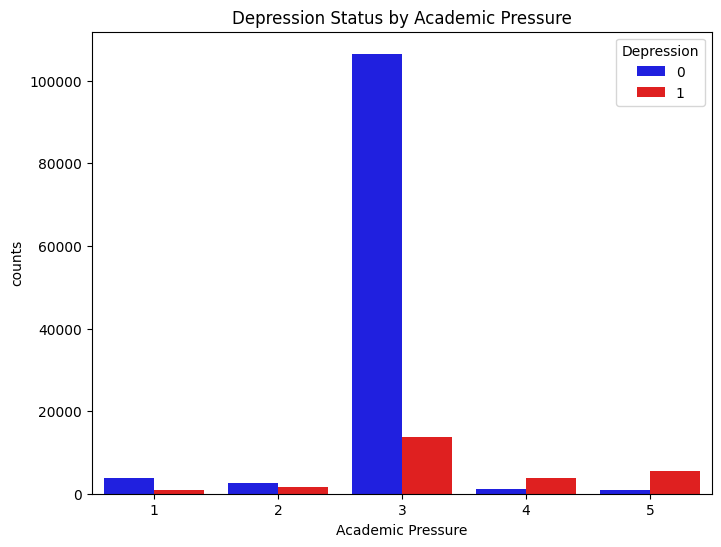

In [92]:
plt.figure(figsize=(8,6))
plt.title('Depression Status by Academic Pressure')
sns.countplot(x='Academic Pressure', hue='Depression', palette=['blue', 'red'], data=df_train)
plt.xlabel('Academic Pressure')
plt.ylabel('counts')

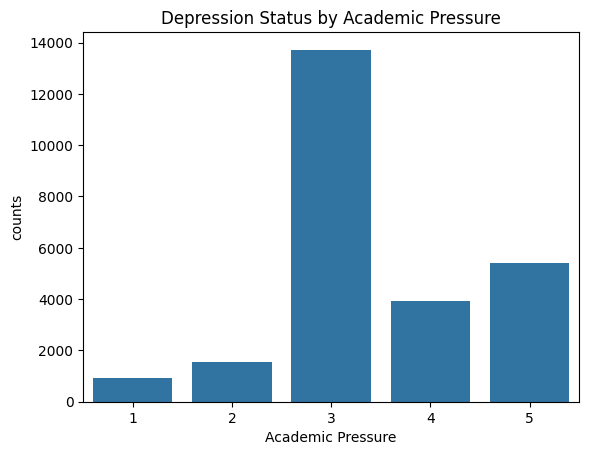

In [93]:
depression_group = df_train[df_train['Depression'] == 1]
sns.countplot(x='Academic Pressure', data=depression_group)
plt.xlabel('Academic Pressure')
plt.ylabel('counts')
plt.title('Depression Status by Academic Pressure')
plt.savefig('depression_by_academic_pressure.png')
plt.show()

In [94]:
def encode(data):
  if data == 0:
    return 'No'
  return 'Yes'

depression_group['Have you ever had suicidal thoughts ?'] = depression_group['Have you ever had suicidal thoughts ?'].apply(encode)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12280\834739997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depression_group['Have you ever had suicidal thoughts ?'] = depression_group['Have you ever had suicidal thoughts ?'].apply(encode)


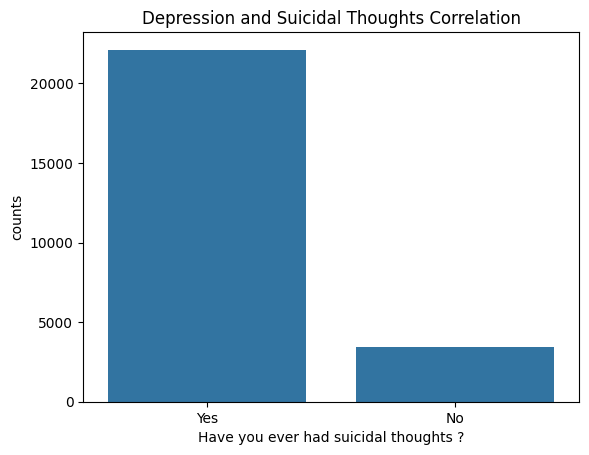

In [95]:
sns.countplot(x='Have you ever had suicidal thoughts ?', data=depression_group)
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('counts')
plt.title('Depression and Suicidal Thoughts Correlation')
plt.savefig('depression_and_suicidal_thoughts_correlation.png')
plt.show()

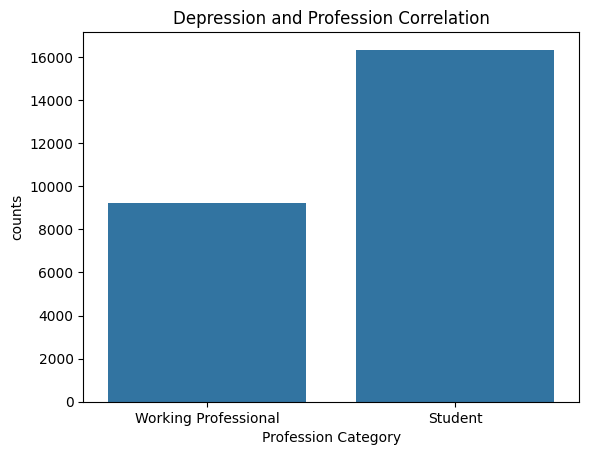

In [96]:
sns.countplot(x='Student', data=depression_group)
plt.xticks(ticks=[0,1], labels=['Working Professional', 'Student'])
plt.xlabel('Profession Category')
plt.ylabel('counts')
plt.title('Depression and Profession Correlation')
plt.savefig('depression_and_profession_correlation.png')
plt.show()

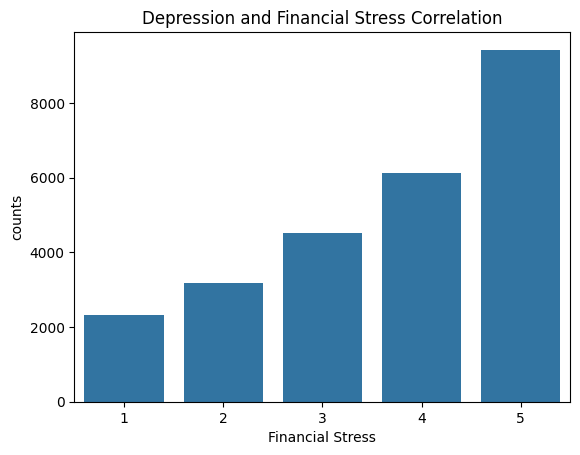

In [97]:
sns.countplot(x='Financial Stress', data=depression_group)
plt.xlabel('Financial Stress')
plt.ylabel('counts')
plt.title('Depression and Financial Stress Correlation')
plt.savefig('depression_and_financial_stress_correlation.png')
plt.show()

In [98]:
depression_group['Financial Stress'].value_counts()

Financial Stress
5    9423
4    6114
3    4528
2    3190
1    2312
Name: count, dtype: int64

In [99]:
depression_group['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    22109
No      3458
Name: count, dtype: int64

In [100]:
depression_group['Depression'].unique()

array([1])

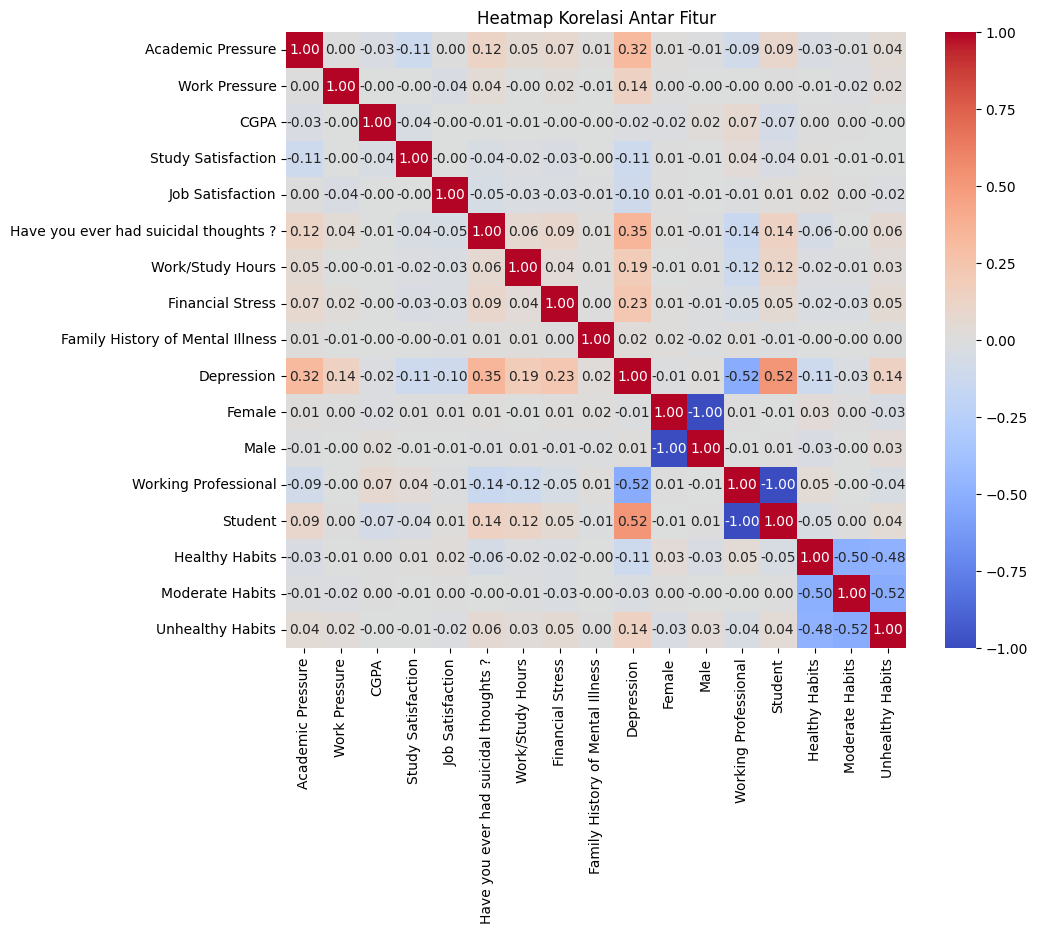

In [101]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.savefig('heatmap_korelasi_antar_fitur.png', bbox_inches='tight', dpi=300)
plt.show()


In [102]:
features = list()
target = list()

for feature in df_train:
  if feature == 'Depression':
    target.append(feature)
  else:
    features.append(feature)

In [103]:
X = df_train[features]
X

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Female,Male,Working Professional,Student,Healthy Habits,Moderate Habits,Unhealthy Habits
0,3,5,7.77,3,2,0,1,2,0,1,0,1,0,1,0,0
1,3,4,7.77,3,3,1,7,3,0,0,1,1,0,0,0,1
2,5,3,8.97,2,3,1,3,1,0,0,1,0,1,1,0,0
3,3,5,7.77,3,1,1,10,1,1,0,1,1,0,0,1,0
4,3,1,7.77,3,1,1,9,4,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,3,5,7.77,3,4,0,2,4,1,1,0,1,0,0,0,1
140696,3,5,7.77,3,4,1,6,5,1,1,0,1,0,0,1,0
140697,3,3,7.77,3,1,0,4,4,0,1,0,1,0,0,1,0
140698,3,5,7.77,3,2,1,10,1,0,1,0,1,0,0,1,0


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)

In [105]:
X = pd.DataFrame(scaled_data, columns=X.columns)
X

,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Female,Male,Working Professional,Student,Healthy Habits,Moderate Habits,Unhealthy Habits
0,0.50,1.00,0.551308,0.50,0.25,0.0,0.083333,0.25,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.50,0.75,0.551308,0.50,0.50,1.0,0.583333,0.50,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.00,0.50,0.792757,0.25,0.50,1.0,0.250000,0.00,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.50,1.00,0.551308,0.50,0.00,1.0,0.833333,0.00,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.50,0.00,0.551308,0.50,0.00,1.0,0.750000,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0.50,1.00,0.551308,0.50,0.75,0.0,0.166667,0.75,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
140696,0.50,1.00,0.551308,0.50,0.75,1.0,0.500000,1.00,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
140697,0.50,0.50,0.551308,0.50,0.00,0.0,0.333333,0.75,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
140698,0.50,1.00,0.551308,0.50,0.25,1.0,0.833333,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [106]:
y = df_train[target]
y

,Depression
0,0
1,1
2,1
3,1
4,0
...,...
140695,1
140696,0
140697,0
140698,0


In [107]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [108]:
XGB_params = {'max_depth': 4,
              'learning_rate': 0.13706825930292102,
              'n_estimators': 474,
              'min_child_weight': 6.2255355962899,
              'gamma': 3.1066513190387837,
              'subsample': 0.6093579453113228,
              'colsample_bytree': 0.5423904352143909,
              'lambda': 2.1249942601788336,
              'alpha': 1.7378135535795907}

In [109]:
model = XGBClassifier(**XGB_params)

In [110]:
score = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

In [111]:
score

np.float64(0.9133404406538735)